In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import time

In [2]:
def load_mnist():
    mnist = fetch_openml("mnist_784", version=1)
    data = mnist['data'].values / 255.0  # Нормализуем значения от 0 до 1
    labels = mnist['target'].astype(int).values
    return data, labels

In [3]:
X, y = load_mnist()

In [4]:
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

In [5]:
train_X, test_X = X[:60000], X[60000:]
train_y, test_y = y_one_hot[:60000], y_one_hot[60000:]

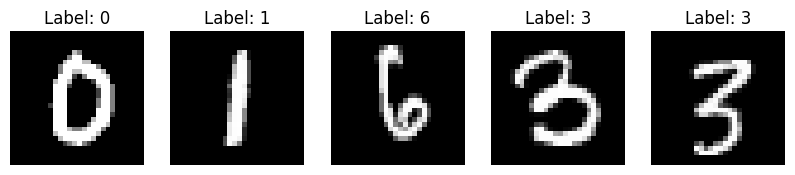

In [6]:
def show_sample_images(X, y, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, X.shape[0])

        image = X[idx].reshape(28, 28)
        label = np.argmax(y[idx])
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

show_sample_images(train_X, train_y)

In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # для численной устойчивости
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y, y_hat):
    m = y.shape[0]
    return -np.sum(y * np.log(y_hat)) / m

def backpropagation(X, y, hidden_layer_output, output_layer_output, W1, b1, W2, b2, learning_rate=0.1):
    m = X.shape[0]

    dL_dz2 = output_layer_output - y
    dL_dW2 = np.dot(hidden_layer_output.T, dL_dz2) / m
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True) / m

    dL_dz1 = np.dot(dL_dz2, W2.T) * relu_derivative(hidden_layer_output)
    dL_dW1 = np.dot(X.T, dL_dz1) / m
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    return W1, b1, W2, b2

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [8]:
# Инициализация параметров сети
input_size = 784  # 28x28
hidden_size = 300
output_size = 10  # 10 классов
learning_rate = 0.1

# Инициализация весов и смещений
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Параметры обучения
epochs = 20
batch_size = 64
num_batches = len(train_X) // batch_size

for epoch in range(epochs):
    epoch_start_time = time.time()
    epoch_accuracy = 0

    for batch in range(num_batches):
        batch_X = train_X[batch * batch_size:(batch + 1) * batch_size]
        batch_y = train_y[batch * batch_size:(batch + 1) * batch_size]

        # Прямой проход
        hidden_layer_input = np.dot(batch_X, W1) + b1
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, W2) + b2
        output_layer_output = softmax(output_layer_input)

        # Обратное распространение ошибки
        W1, b1, W2, b2 = backpropagation(batch_X, batch_y, hidden_layer_output, output_layer_output, W1, b1, W2, b2, learning_rate)

        # Вычисление точности для текущего батча
        batch_accuracy = accuracy(batch_y, output_layer_output)
        epoch_accuracy += batch_accuracy

    epoch_end_time = time.time()
    avg_epoch_accuracy = epoch_accuracy / num_batches
    print(f"Epoch {epoch + 1}/{epochs} - Train accuracy: {avg_epoch_accuracy:.4f} - Time: {epoch_end_time - epoch_start_time:.2f}s")

hidden_layer_input = np.dot(test_X, W1) + b1
hidden_layer_output = relu(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
output_layer_output = softmax(output_layer_input)

test_accuracy = accuracy(test_y, output_layer_output)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/20 - Train accuracy: 0.8671 - Time: 4.73s
Epoch 2/20 - Train accuracy: 0.9332 - Time: 3.82s
Epoch 3/20 - Train accuracy: 0.9499 - Time: 5.84s
Epoch 4/20 - Train accuracy: 0.9605 - Time: 3.75s
Epoch 5/20 - Train accuracy: 0.9676 - Time: 3.89s
Epoch 6/20 - Train accuracy: 0.9729 - Time: 6.14s
Epoch 7/20 - Train accuracy: 0.9765 - Time: 3.83s
Epoch 8/20 - Train accuracy: 0.9795 - Time: 3.86s
Epoch 9/20 - Train accuracy: 0.9818 - Time: 5.99s
Epoch 10/20 - Train accuracy: 0.9841 - Time: 3.76s
Epoch 11/20 - Train accuracy: 0.9860 - Time: 4.14s
Epoch 12/20 - Train accuracy: 0.9874 - Time: 5.96s
Epoch 13/20 - Train accuracy: 0.9890 - Time: 3.85s
Epoch 14/20 - Train accuracy: 0.9903 - Time: 3.80s
Epoch 15/20 - Train accuracy: 0.9911 - Time: 6.01s
Epoch 16/20 - Train accuracy: 0.9924 - Time: 3.83s
Epoch 17/20 - Train accuracy: 0.9932 - Time: 3.72s
Epoch 18/20 - Train accuracy: 0.9938 - Time: 5.82s
Epoch 19/20 - Train accuracy: 0.9948 - Time: 3.98s
Epoch 20/20 - Train accuracy: 0.9954 - T